In [1]:
#Loading all Packages
print("==================== BLOCK 1 Started! ======================")

import pandas as pd
pd.options.display.max_rows=10
pd.options.display.max_columns=50
from collections import Counter
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
from sklearn.cluster import KMeans
n=40
import warnings
warnings.filterwarnings('ignore')
import time
import sklearn
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.cross_validation import train_test_split
from sklearn import datasets
%matplotlib inline

print("==================== Packages Loaded ======================")

==================== BLOCK 1 Started! ======================
==================== Packages Loaded ======================


In [2]:
print("==================== Data Loading ======================")
start_time = time.time()
df=pd.read_csv('MainEncodedData.csv')
del df['Unnamed: 0']
df.info()
print("==================== Data Loaded In ======================")
print("==================== Data shape "+str(df.shape)+" ======================")
print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))

==================== Data Loading ======================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 51 columns):
Age                                  1470 non-null int64
Attrition                            1470 non-null int64
BusinessTravel                       1470 non-null int64
DailyRate                            1470 non-null int64
DistanceFromHome                     1470 non-null int64
Education                            1470 non-null int64
EmployeeCount                        1470 non-null int64
EmployeeNumber                       1470 non-null int64
EnvironmentSatisfaction              1470 non-null int64
HourlyRate                           1470 non-null int64
JobInvolvement                       1470 non-null int64
JobLevel                             1470 non-null int64
JobSatisfaction                      1470 non-null int64
MonthlyIncome                        1470 non-null int64
MonthlyRate                          1

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,...,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,...,0,5,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,2,279,8,1,1,2,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,...,1,7,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1,1,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,...,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,33,0,2,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,...,3,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,0,1,591,2,1,1,7,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,...,2,2,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0


In [4]:
start_time = time.time()

train, test = sklearn.cross_validation.train_test_split(df, train_size = 0.8)
print("For Main Data Set :",df['Attrition'].count())
print("For Train Set :",train['Attrition'].count())
print("For Test Set :",test['Attrition'].count())

x_train=train.drop(train.columns[1], axis = 1)
x_test=test.drop(test.columns[1], axis = 1)
y_train=train['Attrition']
y_test=test['Attrition']

For Main Data Set : 1470
For Train Set : 1176
For Test Set : 294


In [42]:
X = x_train.iloc[:,:].values
y = y_train.values

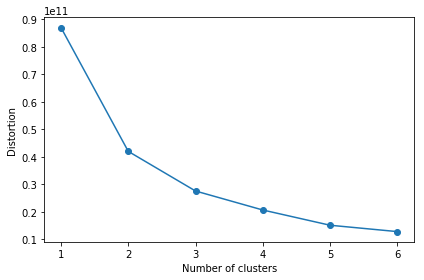

In [8]:
distortions = []
for i in range(1, 7):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(x_train)
    distortions.append(km.inertia_)
plt.plot(range(1,7), distortions , marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

### From the elbow knee plot we can clearly see that the best number of clusters would be either to have 3 or 4 clusters, however we know that we have only 2 classes

In [14]:
for i in range(0,5):
    if i>0:
        print("SSE :"+str(((distortions[i-1]-distortions[i])/distortions[i-1])*100)+" for k="+str(i))

SSE :51.699285012081006 for k=1
SSE :34.26916166394969 for k=2
SSE :24.99194369177338 for k=3
SSE :26.721995786642427 for k=4


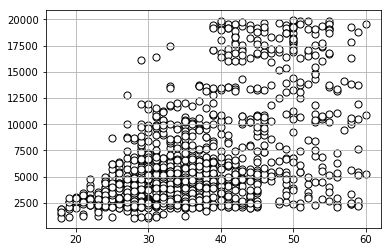

In [64]:
hori, vert = [0, 12]
plt.scatter(X[:,hori], X[:,vert], c='white', edgecolors='black', marker='o', s=50)
plt.grid()


In [80]:
km = KMeans(n_clusters=2, 
            init='k-means++', 
            n_init=50, 
            max_iter=52000,
            tol=1e-04,
            random_state=1)


In [81]:
y_km = km.fit_predict(X)

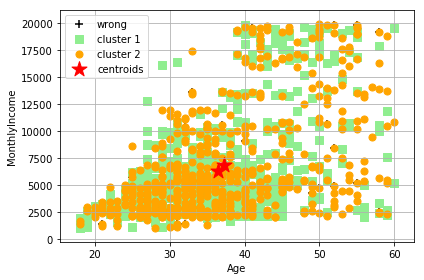

In [82]:
# First plot the incorrect clusters ===================================================================
cl_map = dict()
for i in range(0,2):
    counter = Counter(y[y_km ==i])
    cl_map[i] = counter.most_common(1)[0][0]
y_km_class = [cl_map[i] for i in y_km]
y_km_class = np.asarray(y_km_class)
# scatter plot of the wrong predictions
plt.scatter(X[y_km_class!=y,hori], 
            X[y_km_class!=y,vert], 
            s=50, 
            marker='+', 
            c='black', 
            label='wrong')

# Plot the real cluster values ===================================================================
# scatter plot of elements of cluster 0 (named cluster 1)
plt.scatter(X[y_km==0,hori], # select only the rows for which cluster label is 0
            X[y_km==0,vert], 
            s=50, 
            c='lightgreen', 
            marker='s', 
            label='cluster 1')
# scatter plot of elements of cluster 1 (named cluster 2)
plt.scatter(X[y_km==1,hori], # select only the rows for which cluster label is 1
            X[y_km==1,vert], 
            s=50, 
            c='orange', 
            marker='o', 
            label='cluster 2')

# plot the centers  ===================================================================
names = x_train.columns
# scatter plot of the centroids
plt.scatter(km.cluster_centers_[:,hori], 
            km.cluster_centers_[:,vert], 
            s=250, 
            marker='*', 
            c='red', 
            label='centroids')

plt.xlabel(names[hori]) # set the names of the axes
plt.ylabel(names[vert])
plt.legend() # the legend is automatically drawn from the "label" parameter
plt.grid()
plt.tight_layout()
#plt.savefig('./figures/centroids.png', dpi=300)
plt.show()

In [79]:
print('Distortion: %.2f' % km.inertia_)

Distortion: 42010971261.91


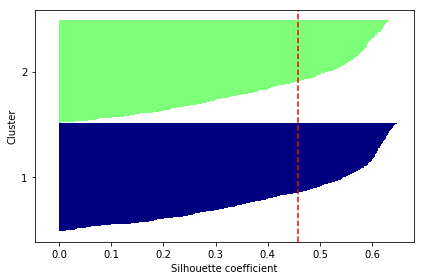

In [83]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0] # it is the number of rows
# Compute the Silhouette Coefficient for each sample, with the euclidean metric
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels): # generate pairs index, cluster_label
    c_silhouette_vals = silhouette_vals[y_km==c] # extracts records with the current cluster label
    c_silhouette_vals.sort() # sort the silhouette vals for the current class
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
            edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

In [87]:
y_pred=km.predict(x_test)

In [88]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(2)]
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

    Class 0       0.83      0.47      0.60       249
    Class 1       0.14      0.49      0.22        45

avg / total       0.73      0.47      0.54       294



ROC AUC: 0.48


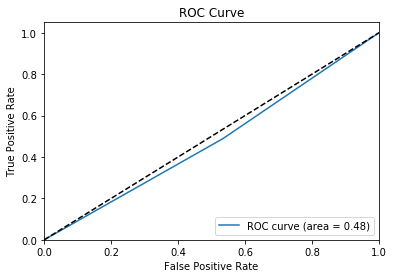

In [89]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
 
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()